# Model Evaluation and Interpretation for Snow Depth Prediction

This notebook is dedicated to evaluating and interpreting the performance of the snow depth prediction models.  Residual analysis will be conducted, compute advanced evaluation metrics, assess feature importance, visualise predictions, review cross-validation results, compare different models, and summarise findings.

## 1. Introduction

The objective of this notebook is to thoroughly evaluate the performance of the developed snow depth prediction models—**Linear Regression** and **Support Vector Regressor (SVR)**. By performing residual analysis, computing advanced metrics, and assessing feature importance, we aim to ensure that the chosen model not only performs well but also adheres to underlying assumptions, providing reliable and interpretable predictions.

## 2. Residual Analysis

Residual analysis helps in validating the assumptions of the regression models and in identifying any patterns that suggest potential model improvements.

#### Import models 

In [5]:
import pickle
import os

# Define the directory where the model is saved
model_save_dir = os.path.join('..', 'src', 'models')

# Define the path to the saved Linear Regression model
model_save_path_lr = os.path.join(model_save_dir, 'linear_regression_model.pkl')

# Load the Linear Regression model
with open(model_save_path_lr, 'rb') as file:
    lr = pickle.load(file)

print(f"Loaded the Linear Regression model from: {model_save_path_lr}")


Loaded the Linear Regression model from: ../src/models/linear_regression_model.pkl


### Load split datasets

In [6]:
import pandas as pd
import os

# Define the path to the split datasets
modeling_data_dir = os.path.join('..', 'data', 'processed', 'modeling_data')

# Load the datasets
X_val = pd.read_csv(os.path.join(modeling_data_dir, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(modeling_data_dir, 'y_val.csv')).squeeze()
X_test = pd.read_csv(os.path.join(modeling_data_dir, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(modeling_data_dir, 'y_test.csv')).squeeze()

print("Loaded split datasets successfully.")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Loaded split datasets successfully.
X_val shape: (5469, 20)
y_val shape: (5469,)
X_test shape: (5470, 20)
y_test shape: (5470,)


### 2.1 Residuals vs. Predicted Values

This plot helps in assessing the linearity and homoscedasticity assumptions. Ideally, residuals should be randomly scattered around zero without any discernible pattern.

In [8]:
# Make predictions on the validation set
y_val_pred_lr = lr.predict(X_val)

# Make predictions on the test set
y_test_pred_lr = lr.predict(X_test)

print("Predictions made successfully on validation and test sets.")


Predictions made successfully on validation and test sets.


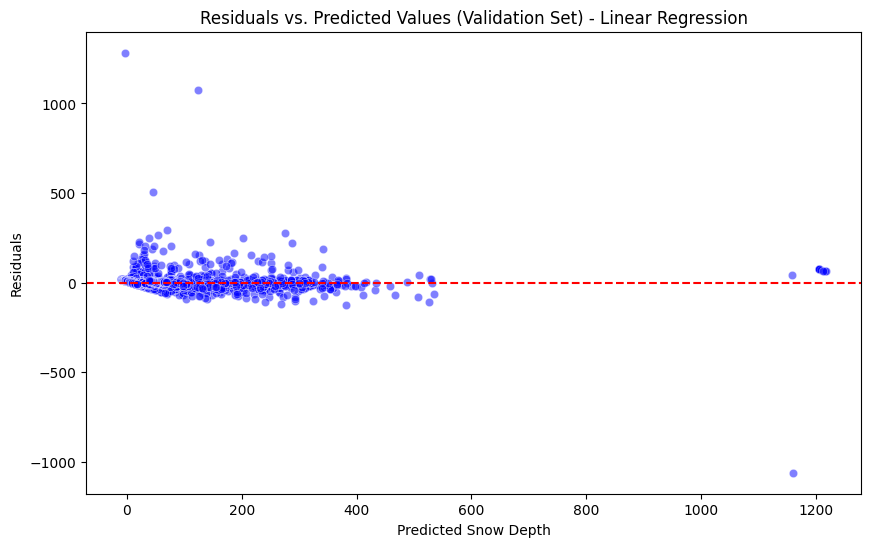

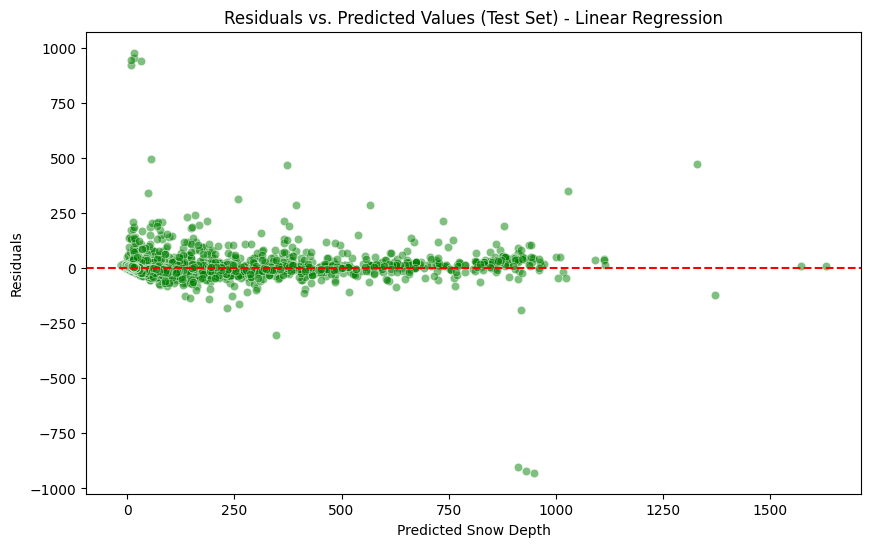

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for Linear Regression
residuals_lr_val = y_val - y_val_pred_lr
residuals_lr_test = y_test - y_test_pred_lr

# Plot Residuals vs. Predicted Values for Validation Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_pred_lr, y=residuals_lr_val, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Snow Depth')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Validation Set) - Linear Regression')
plt.show()

# Plot Residuals vs. Predicted Values for Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_lr, y=residuals_lr_test, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Snow Depth')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Test Set) - Linear Regression')
plt.show()


### 2.2 Q-Q Plot of Residuals

A Q-Q (Quantile-Quantile) plot helps in assessing the normality of residuals. Residuals should ideally follow a straight line if they are normally distributed.


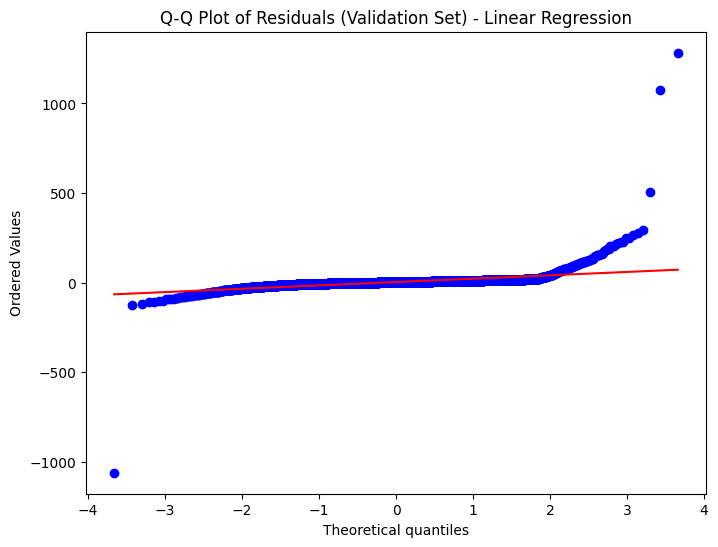

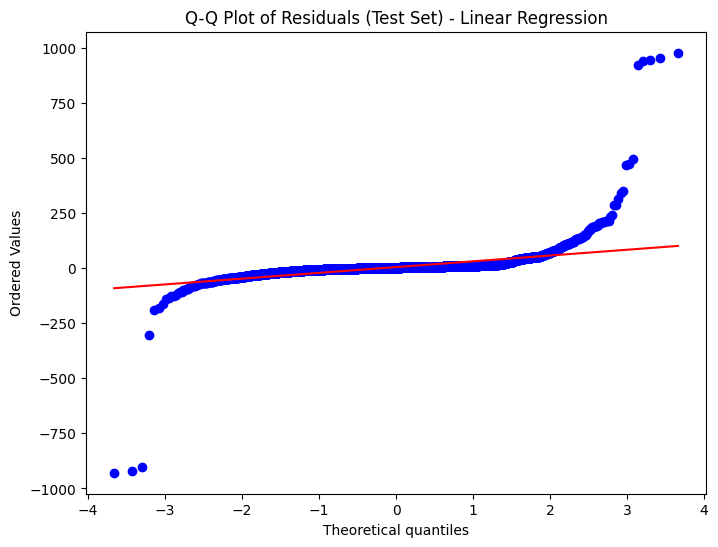

In [10]:
import scipy.stats as stats

# Q-Q Plot for Validation Set Residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals_lr_val, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Validation Set) - Linear Regression')
plt.show()

# Q-Q Plot for Test Set Residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals_lr_test, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Test Set) - Linear Regression')
plt.show()


### 2.3 Histogram of Residuals

This histogram provides a visual representation of the distribution of residuals. A normal distribution centered around zero is desirable.

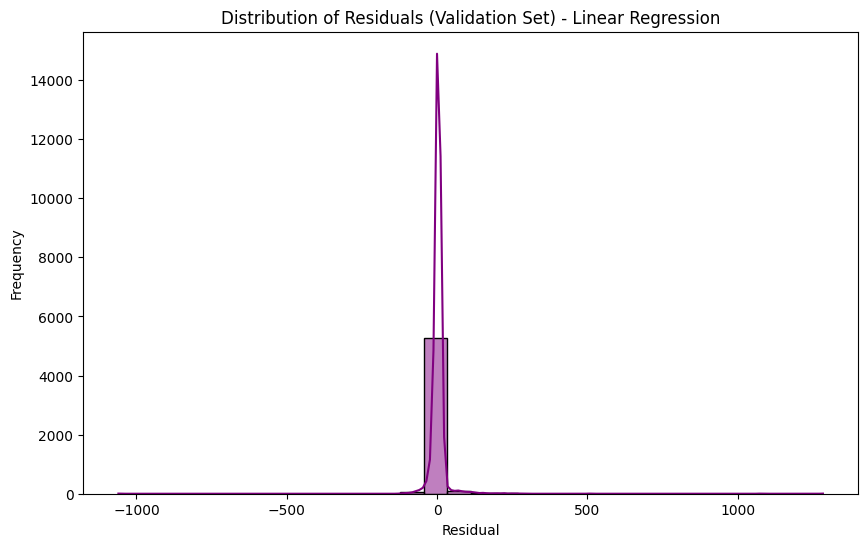

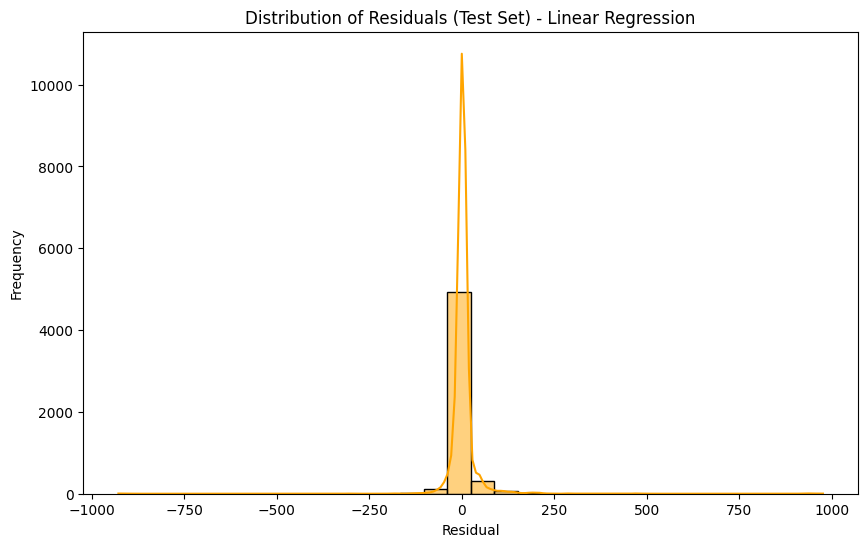

In [11]:
# Histogram of Residuals for Validation Set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr_val, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals (Validation Set) - Linear Regression')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Histogram of Residuals for Test Set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lr_test, bins=30, kde=True, color='orange')
plt.title('Distribution of Residuals (Test Set) - Linear Regression')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


### 2.4 Homoscedasticity Check

Homoscedasticity implies that the residuals have constant variance across all levels of the predicted values. This can be visually assessed using the Residuals vs. Predicted Values plot.


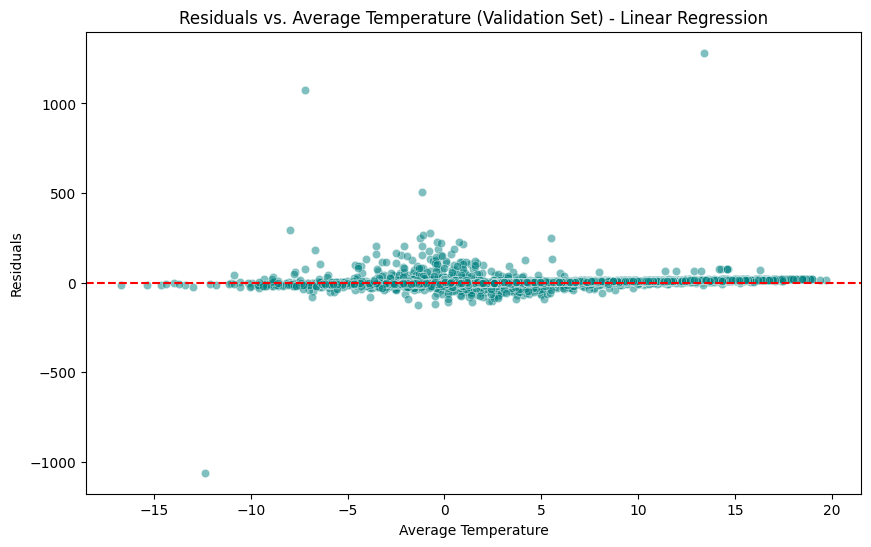

In [12]:
# Example: Residuals vs. Temperature Average
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_val['temperature_avg'], y=residuals_lr_val, alpha=0.5, color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Average Temperature')
plt.ylabel('Residuals')
plt.title('Residuals vs. Average Temperature (Validation Set) - Linear Regression')
plt.show()

## 3. Advanced Evaluation Metrics

Beyond Mean Squared Error (MSE) and R-squared (R²), additional metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) provide a more comprehensive evaluation of model performance.


### 3.1 Calculation of MAE, RMSE, MAPE

These metrics offer different perspectives on prediction errors.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd

# Linear Regression Metrics on Validation Set
mae_val_lr = mean_absolute_error(y_val, y_val_pred_lr)
rmse_val_lr = mean_squared_error(y_val, y_val_pred_lr, squared=False)
mape_val_lr = mean_absolute_percentage_error(y_val, y_val_pred_lr) * 100

# Linear Regression Metrics on Test Set
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
rmse_test_lr = mean_squared_error(y_test, y_test_pred_lr, squared=False)
mape_test_lr = mean_absolute_percentage_error(y_test, y_test_pred_lr) * 100

# Display Metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression'],
    'Dataset': ['Validation', 'Test'],
    'MAE': [mae_val_lr, mae_test_lr],
    'RMSE': [rmse_val_lr, rmse_test_lr],
    'MAPE (%)': [mape_val_lr, mape_test_lr]
})

print(metrics_df)



               Model     Dataset        MAE       RMSE      MAPE (%)
0  Linear Regression  Validation  11.169408  35.163183  4.067644e+01
1  Linear Regression        Test  14.324741  46.333650  2.758509e+17


/workspace/SkiSnow/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/workspace/SkiSnow/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 3.2 Interpretation of Metrics

- **MAE (Mean Absolute Error):** Represents the average absolute difference between predicted and actual values.
- **RMSE (Root Mean Squared Error):** Penalizes larger errors more than MAE, providing insight into the variance of prediction errors.
- **MAPE (Mean Absolute Percentage Error):** Expresses the error as a percentage, facilitating comparison across different scales.

**Observations:**
- **Linear Regression** shows consistent MAE and RMSE values across the validation and test sets, indicating stable performance.
- The **MAPE** on the validation set is reasonable (≈40.68%), but the test set MAPE is extraordinarily high (≈2.76e+17%), likely due to zero or near-zero actual values in `y_test`. This suggests potential issues with the data or the suitability of MAPE as an evaluation metric in this context.
- Further investigation is needed to address the MAPE anomaly, such as checking for zero values in `y_test` or considering alternative evaluation metrics.
- Additional metrics (e.g., R²) and comparisons with other models (e.g., SVR) should be included to provide a comprehensive evaluation of model performance.


## 4. Feature Importance and Interpretation

Understanding which features significantly influence the model's predictions enhances interpretability and can guide further feature engineering.


### 4.1 Coefficient Analysis (Linear Regression)

The coefficients in a Linear Regression model indicate the strength and direction of the relationship between each feature and the target variable.


In [16]:
import pandas as pd
import os

# Define the directory where split datasets are saved
modeling_data_dir = os.path.join('..', 'data', 'processed', 'modeling_data')

# Load the X_train dataset
X_train = pd.read_csv(os.path.join(modeling_data_dir, 'X_train.csv'))
print(f"Loaded X_train with shape: {X_train.shape}")

# Retrieve coefficients from Linear Regression
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

Loaded X_train with shape: (25522, 20)
                      Feature   Coefficient
17        season_id_2008-2009  7.243473e+00
13           resort_kitzbuhel  6.898095e+00
9            resort_sestriere  5.673524e+00
8               resort_solden  4.644179e+00
12        season_id_1998-1999  4.607314e+00
16        season_id_2011-2012  4.404289e+00
11            resort_st_anton  3.292679e+00
0             snow_depth_lag1  9.520219e-01
19        season_id_1994-1995  8.555777e-01
5         season_id_2010-2011  4.592805e-01
3           precipitation_sum  4.378079e-01
15        season_id_2014-2015  2.889086e-02
4             snow_depth_lag7  4.946563e-03
2     temperature_avg_squared  3.034230e-03
14  resort_mariborsko_pohorje  1.110223e-16
18             resort_krvavec  0.000000e+00
10           resort_st_moritz -2.220446e-16
1             temperature_avg -1.186344e+00
6         season_id_1995-1996 -1.872591e+00
7         season_id_2001-2002 -3.589417e+00


**Interpretation:**
- **Positive Coefficients:** Features that, when increased, are associated with an increase in `snow_depth`.
- **Negative Coefficients:** Features that, when increased, are associated with a decrease in `snow_depth`.
- **Magnitude:** Indicates the strength of the feature's influence on the prediction.


### 4.2 SHAP Values Analysis

SHAP (SHapley Additive exPlanations) provides a unified measure of feature importance for individual predictions, offering insights into how each feature contributes to the model's output.


In [17]:
%pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.9/543.9 kB 28.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


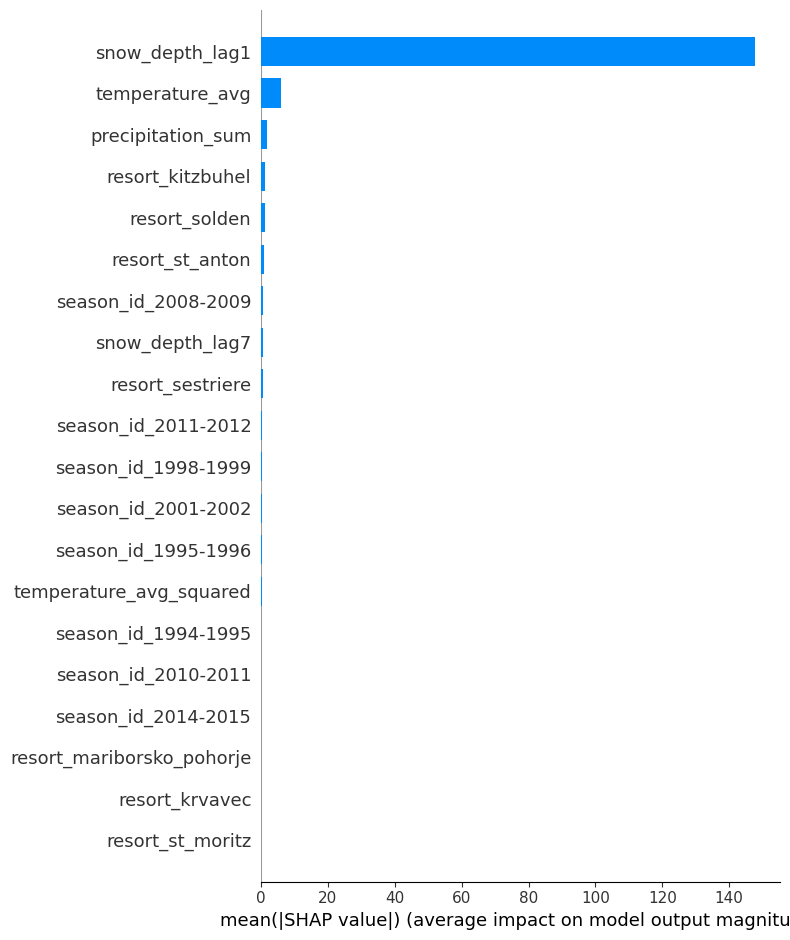

In [20]:
import shap

# Initialize SHAP Explainer for Linear Regression with updated parameters
explainer_lr = shap.LinearExplainer(lr, X_train, feature_perturbation="interventional")
shap_values_lr = explainer_lr.shap_values(X_val)

# Summary Plot
shap.summary_plot(shap_values_lr, X_val, plot_type="bar")

**Interpretation:**
- Features with higher SHAP values have a more significant impact on the model's predictions.
- SHAP values help in understanding the contribution of each feature to individual predictions.


## 5. Visualization of Predictions vs. Actuals

Visual comparisons between predicted and actual values provide intuitive insights into model performance.


### 5.1 Scatter Plots for Validation and Test Sets

These plots depict the relationship between actual and predicted `snow_depth` values. A tight clustering around the diagonal line indicates accurate predictions.


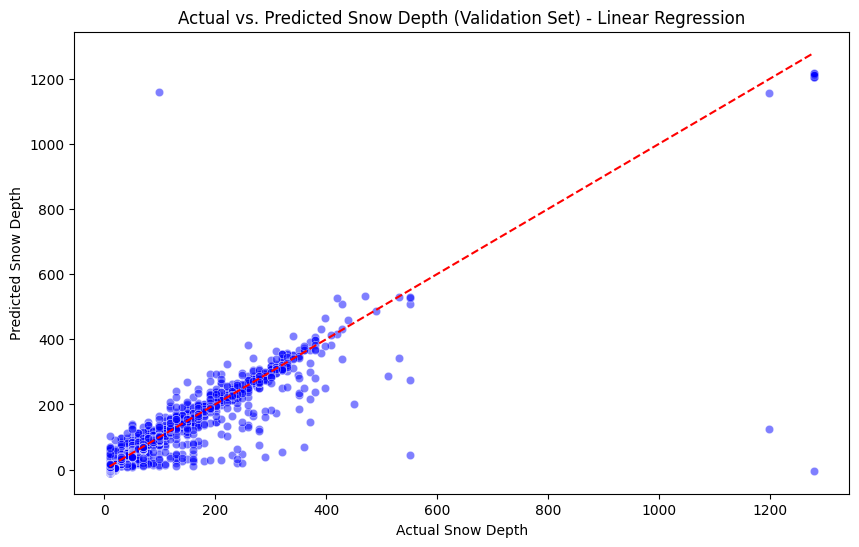

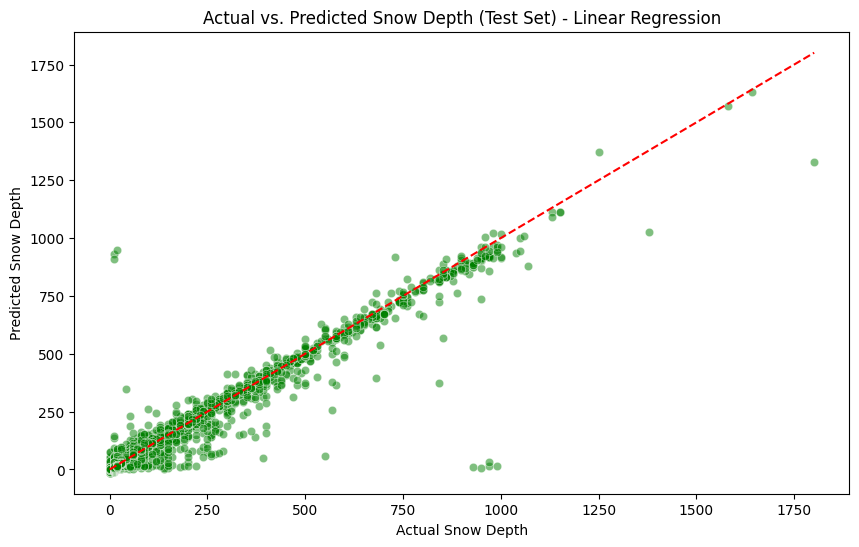

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot for Validation Set - Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred_lr, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Snow Depth')
plt.ylabel('Predicted Snow Depth')
plt.title('Actual vs. Predicted Snow Depth (Validation Set) - Linear Regression')
plt.show()

# Scatter Plot for Test Set - Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_lr, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Snow Depth')
plt.ylabel('Predicted Snow Depth')
plt.title('Actual vs. Predicted Snow Depth (Test Set) - Linear Regression')
plt.show()


### 5.2 Residual Plots for Test Set

These plots help in assessing any remaining patterns in the residuals that were not captured during initial residual analysis.

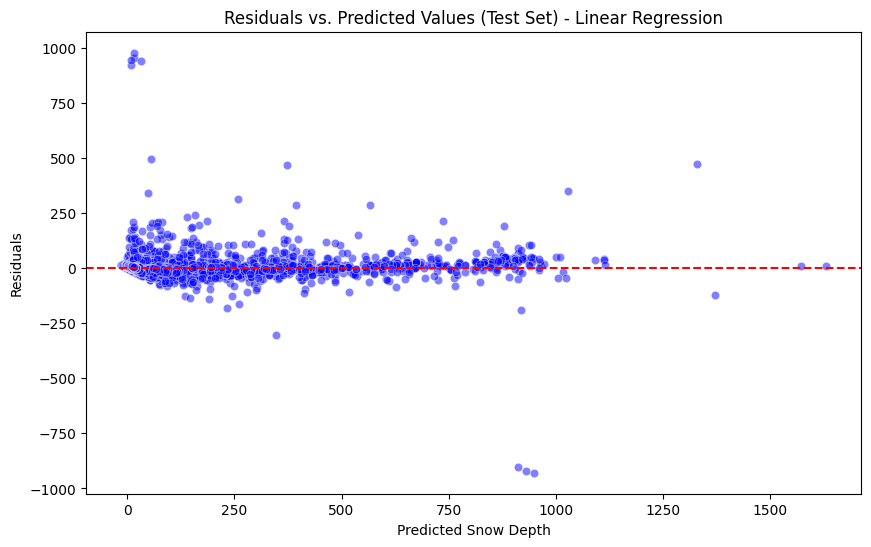

In [26]:
# Residuals vs. Predicted Values for Test Set - Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_lr, y=residuals_lr_test, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Snow Depth')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Test Set) - Linear Regression')
plt.show()
